The objective of the Lab is to show how to calculate probabilities for particular
distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate samples from distributions

In [9]:
# Number of samples
n = 1000

## Let's look at their probability density functions!
Please change some parameters in the plots, and see what happens!

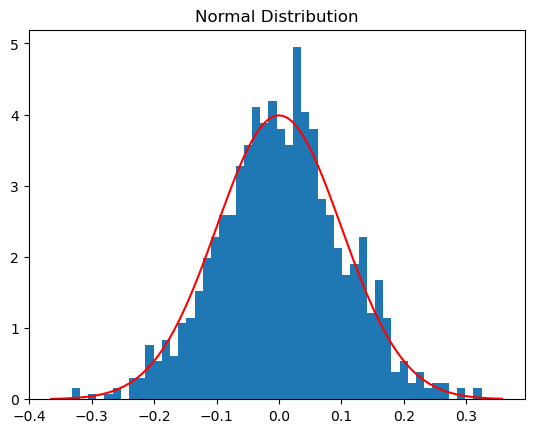

In [3]:
# Normal distribution
mean, std_dev = 0, 0.1
normal_data = np.random.normal(mean, std_dev, n)
plt.figure()
plt.title('Normal Distribution')
plt.hist(normal_data, bins=50, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'r')
plt.show()

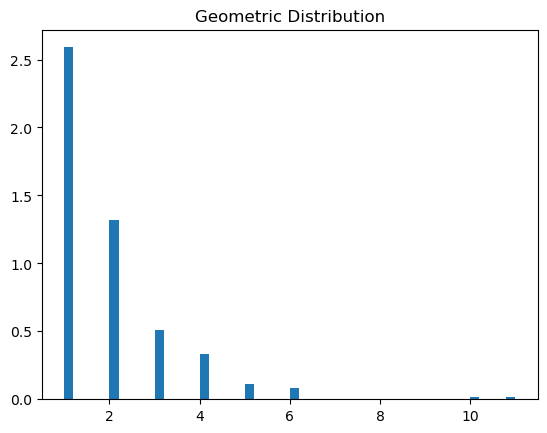

In [4]:
# Geometric distribution
p = 0.5
geometric_data = np.random.geometric(p, n)
plt.figure()
plt.title('Geometric Distribution')
plt.hist(geometric_data, bins=50, density=True)
plt.show()

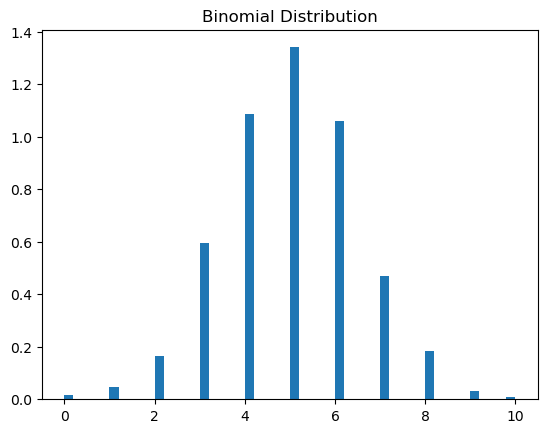

In [5]:
# Binomial distribution
n_trials, p_success = 10, 0.5
binomial_data = np.random.binomial(n_trials, p_success, n)
plt.figure()
plt.title('Binomial Distribution')
plt.hist(binomial_data, bins=50, density=True)
plt.show()

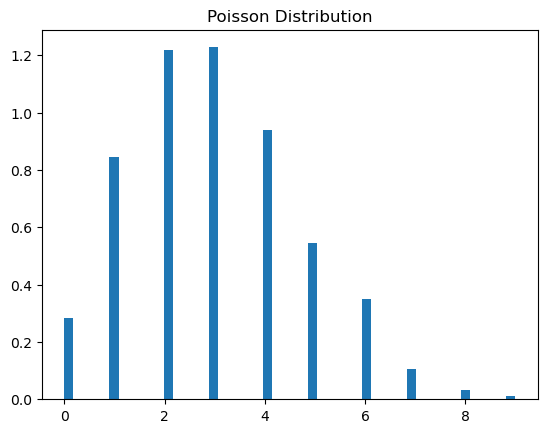

In [6]:
# Poisson distribution
lambda_val = 3
poisson_data = np.random.poisson(lambda_val, n)
plt.figure()
plt.title('Poisson Distribution')
plt.hist(poisson_data, bins=50, density=True)
plt.show()

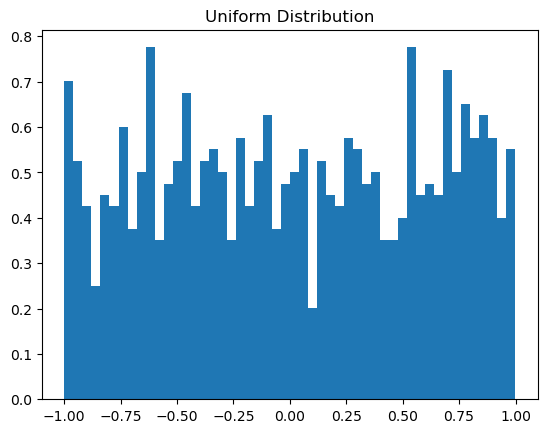

In [7]:
# Uniform distribution
uniform_data = np.random.uniform(-1, 1, n)
plt.figure()
plt.title('Uniform Distribution')
plt.hist(uniform_data, bins=50, density=True)
plt.show()

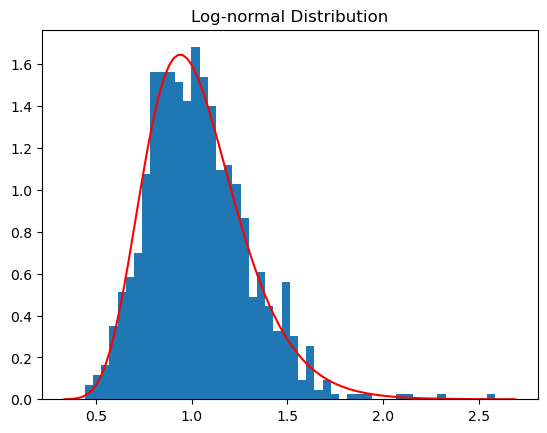

In [15]:
# Log-normal distribution
mean_ln, std_dev_ln = 0, 0.25
lognormal_data = np.random.lognormal(mean_ln, std_dev_ln, n)
plt.figure()
plt.title('Log-normal Distribution')
plt.hist(lognormal_data, bins=50, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.lognorm.pdf(x, std_dev_ln, scale=np.exp(mean_ln))
plt.plot(x, pdf, 'r')
plt.show()

## Let's look at their cumulative density functions!

In [10]:
# Generate data (or use your existing data)
n = 1000
normal_data = np.random.normal(0, 0.1, n)
geometric_data = np.random.geometric(0.5, n)
binomial_data = np.random.binomial(10, 0.5, n)
poisson_data = np.random.poisson(3, n)
uniform_data = np.random.uniform(-1, 1, n)
lognormal_data = np.random.lognormal(0, 0.1, n)

# Function to calculate and plot CDF
def plot_cdf(data, title, xlabel, ylabel='CDF'):
    data_sorted = np.sort(data)
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(data_sorted, p)
    plt.show()

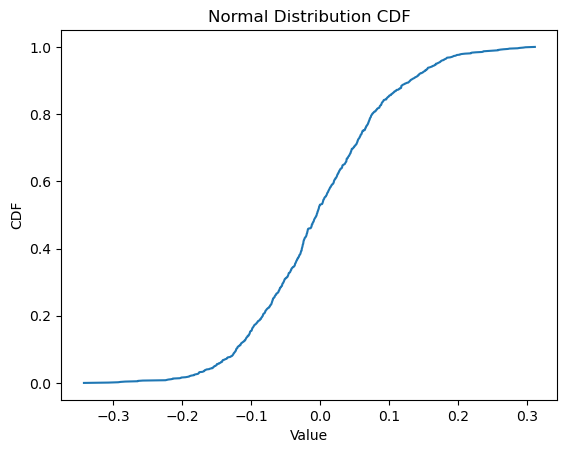

In [11]:
# Normal distribution CDF
plot_cdf(normal_data, 'Normal Distribution CDF', 'Value')

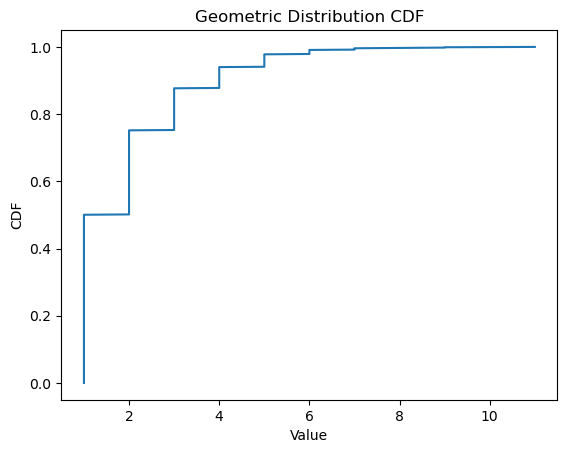

In [12]:
# Geometric distribution CDF
plot_cdf(geometric_data, 'Geometric Distribution CDF', 'Value')

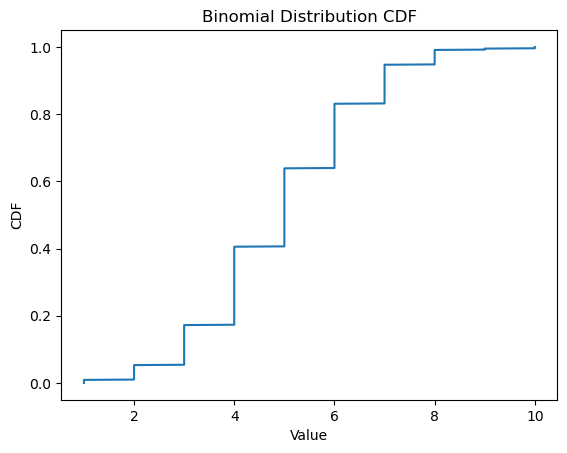

In [13]:
# Binomial distribution CDF
plot_cdf(binomial_data, 'Binomial Distribution CDF', 'Value')

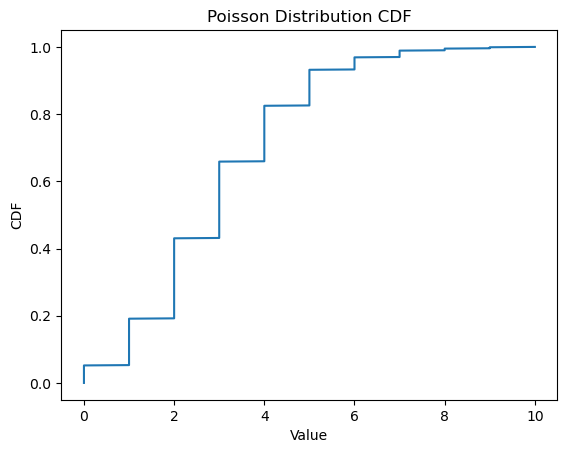

In [14]:
# Poisson distribution CDF
plot_cdf(poisson_data, 'Poisson Distribution CDF', 'Value')

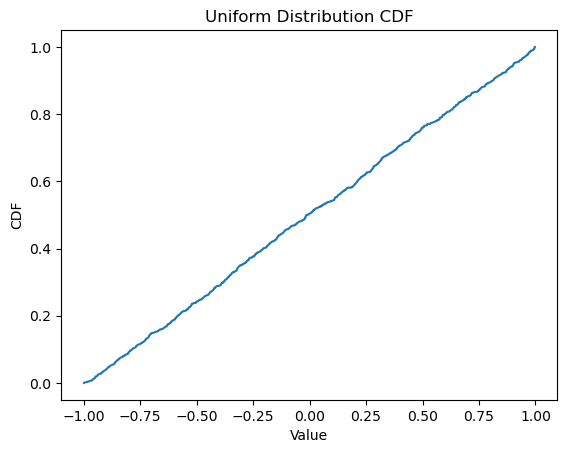

In [15]:
# Uniform distribution CDF
plot_cdf(uniform_data, 'Uniform Distribution CDF', 'Value')

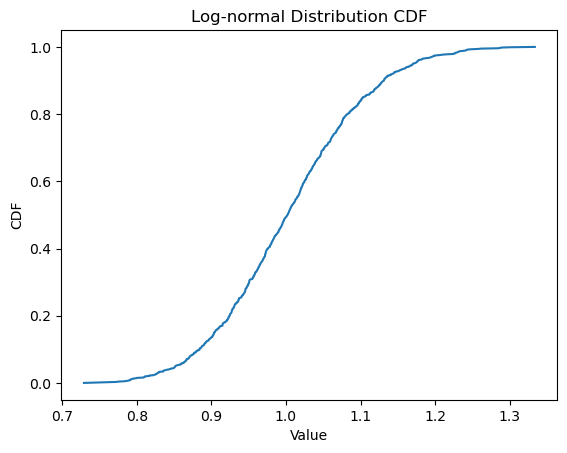

In [16]:
# Log-normal distribution CDF
plot_cdf(lognormal_data, 'Log-normal Distribution CDF', 'Value')

# Calculate Probability (Discrete) and Cumulative Probability (Continuous)

In [21]:
# Function to calculate probability for discrete distributions
def calc_discrete_prob(distribution, value, *params):
    if distribution == 'binomial':
        n, p = params
        return stats.binom.pmf(value, n, p)
    elif distribution == 'geometric':
        p = params[0]
        return stats.geom.pmf(value, p)
    elif distribution == 'poisson':
        lambda_val = params[0]
        return stats.poisson.pmf(value, lambda_val)

# Function to calculate cumulative probability for continuous distributions
def calc_continuous_prob(distribution, value, *params):
    if distribution == 'normal':
        mean, std_dev = params
        return stats.norm.cdf(value, mean, std_dev)
    elif distribution == 'uniform':
        a, b = params
        return stats.uniform.cdf(value, a, b-a)
    elif distribution == 'lognormal':
        mean_ln, std_dev_ln = params
        return stats.lognorm.cdf(value, std_dev_ln, scale=np.exp(mean_ln))

In [19]:
# Test the functions
# Discrete distributions
print(f"Probability of getting 5 successes in a Binomial distribution (n=10, p=0.5): {calc_discrete_prob('binomial', 5, 10, 0.5)}")
print(f"Probability of first success occurring on 2nd trial in a Geometric distribution (p=0.5): {calc_discrete_prob('geometric', 2, 0.5)}")
print(f"Probability of getting 3 events in a Poisson distribution (lambda=3): {calc_discrete_prob('poisson', 3, 3)}")

Probability of getting 5 successes in a Binomial distribution (n=10, p=0.5): 0.24609375000000003
Probability of first success occurring on 2nd trial in a Geometric distribution (p=0.5): 0.25
Probability of getting 3 events in a Poisson distribution (lambda=3): 0.22404180765538775


In [20]:
# Continuous distributions
print(f"Cumulative probability of value <= 0 in a Normal distribution (mean=0, std_dev=0.1): {calc_continuous_prob('normal', 0, 0, 0.1)}")
print(f"Cumulative probability of value <= 0.5 in a Uniform distribution (a=-1, b=1): {calc_continuous_prob('uniform', 0.5, -1, 1)}")
print(f"Cumulative probability of value <= 1 in a Log-normal distribution (mean_ln=0, std_dev_ln=0.1): {calc_continuous_prob('lognormal', 1, 0, 0.1)}")

Cumulative probability of value <= 0 in a Normal distribution (mean=0, std_dev=0.1): 0.5
Cumulative probability of value <= 0.5 in a Uniform distribution (a=-1, b=1): 0.75
Cumulative probability of value <= 1 in a Log-normal distribution (mean_ln=0, std_dev_ln=0.1): 0.5


# Fit data with these Distributions

In [22]:
# Number of samples
n = 1000

# Generate synthetic data
normal_data = np.random.normal(0, 0.1, n)
geometric_data = np.random.geometric(0.5, n)
binomial_data = np.random.binomial(10, 0.5, n)
poisson_data = np.random.poisson(3, n)
uniform_data = np.random.uniform(-1, 1, n)
lognormal_data = np.random.lognormal(0, 0.1, n)

Fit data to distributions

In [23]:
# Normal distribution
normal_params = stats.norm.fit(normal_data)
print(f"Fitted Normal parameters (mean, std_dev): {normal_params}")

Fitted Normal parameters (mean, std_dev): (-0.0014872105968445257, 0.09967709706431886)


In [24]:
# Geometric distribution
geometric_params = stats.geom.fit(geometric_data, floc=0)  # floc=0 sets the location parameter to 0
print(f"Fitted Geometric parameter (p): {geometric_params[0]}")

AttributeError: 'geom_gen' object has no attribute 'fit'

In [25]:
# Binomial distribution
binomial_params = stats.binom.fit(binomial_data, floc=0)  # floc=0 sets the location parameter to 0
print(f"Fitted Binomial parameters (n, p): {binomial_params[0], binomial_params[1]}")

AttributeError: 'binom_gen' object has no attribute 'fit'

In [26]:
# Poisson distribution
poisson_params = stats.poisson.fit(poisson_data, floc=0)  # floc=0 sets the location parameter to 0
print(f"Fitted Poisson parameter (lambda): {poisson_params[0]}")

AttributeError: 'poisson_gen' object has no attribute 'fit'

In [27]:
# Uniform distribution
uniform_params = stats.uniform.fit(uniform_data)
print(f"Fitted Uniform parameters (a, b): {uniform_params[0], uniform_params[1] + uniform_params[0]}")

Fitted Uniform parameters (a, b): (-0.9992244831444002, 0.9982891010804065)


In [28]:
# Log-normal distribution
lognormal_params = stats.lognorm.fit(lognormal_data, floc=0)  # floc=0 sets the location parameter to 0
print(f"Fitted Log-normal parameters (std_dev, scale): {lognormal_params[0], lognormal_params[2]}")


Fitted Log-normal parameters (std_dev, scale): (0.10003476254825583, 1.0034688407893435)


Note: We don't have `fit` functions for discrete distributions in `stats` packages!

## Original data vs fitted data

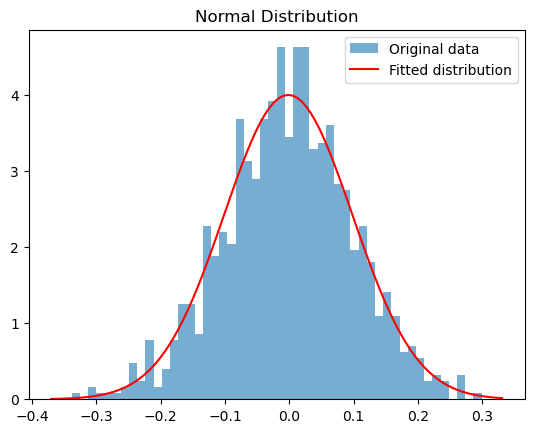

In [29]:
# Optionally, you can plot fitted vs original data (for Normal distribution as an example)
plt.figure()
plt.hist(normal_data, bins=50, density=True, alpha=0.6, label='Original data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_fitted = stats.norm.pdf(x, *normal_params)
plt.plot(x, pdf_fitted, 'r', label='Fitted distribution')
plt.legend()
plt.title('Normal Distribution')
plt.show()

# Normal distribution as a approximation of Binomial distribution

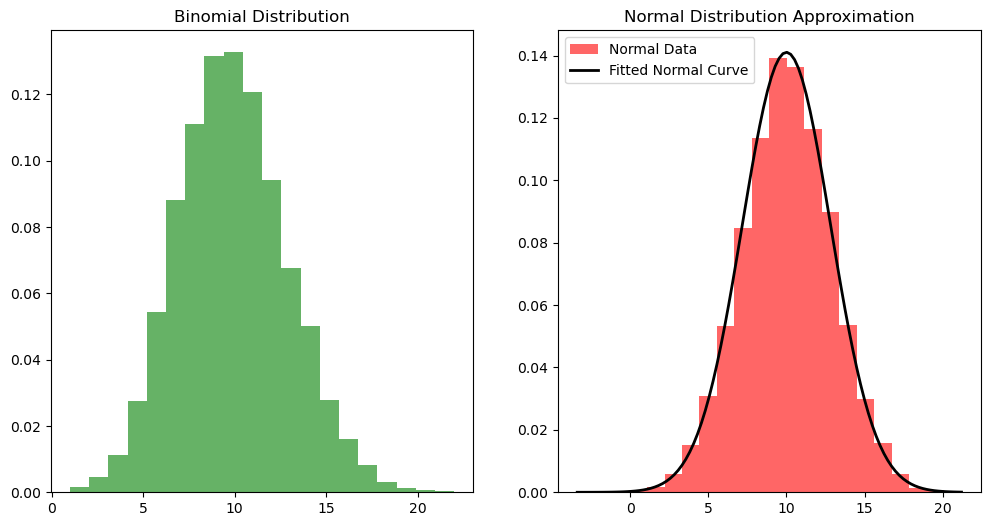

In [34]:
# Parameters for Binomial distribution
n = 50  # Number of trials
p = 0.2  # Probability of success

# Generate Binomial data
binomial_data = np.random.binomial(n, p, 10000)

# Parameters for approximating Normal distribution
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Generate Normal data
normal_data = np.random.normal(mu, sigma, 10000)

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot Binomial distribution
plt.subplot(1, 2, 1)
plt.title('Binomial Distribution')
plt.hist(binomial_data, bins=20, density=True, alpha=0.6, color='g', label='Binomial Data')

# Plot Normal distribution
plt.subplot(1, 2, 2)
plt.title('Normal Distribution Approximation')
plt.hist(normal_data, bins=20, density=True, alpha=0.6, color='r', label='Normal Data')

# Adding fitted Normal curve to Binomial data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'k', linewidth=2, label='Fitted Normal Curve')

plt.legend()
plt.show()

## Random seed

The use of random seeds is important for ensuring reproducibility in scientific computations. When you set a seed before generating random numbers, you make the output deterministic, so you can get the same sequence of "random" numbers each time you run the code. This is invaluable for debugging and for sharing results with others.

In Python, you can set the seed using numpy like so: `np.random.seed(seed_value)`, where `seed_value` is an integer.

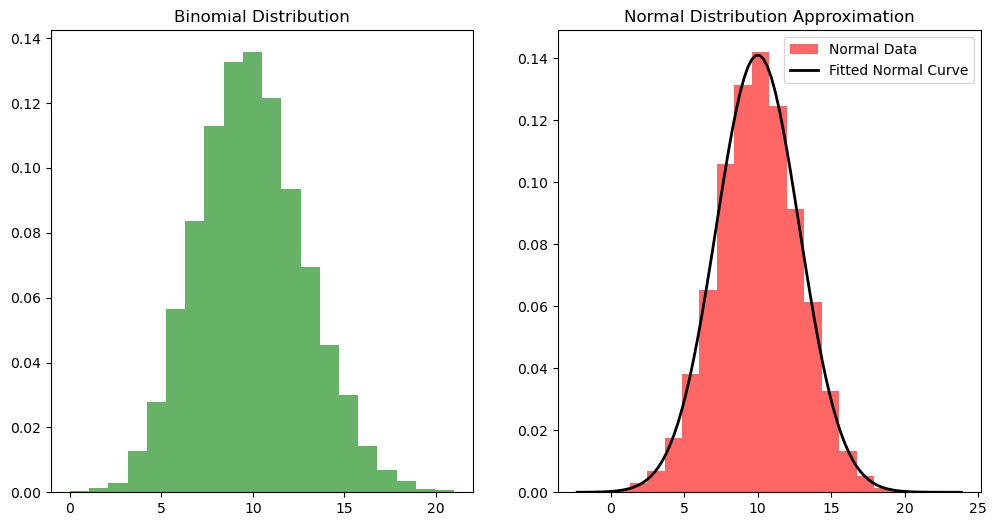

In [36]:
# Set random seeds for reproducibility
np.random.seed(42)

# Parameters for Binomial distribution
n = 50  # Number of trials
p = 0.2  # Probability of success

# Generate Binomial data
binomial_data = np.random.binomial(n, p, 10000)

# Parameters for approximating Normal distribution
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Generate Normal data
normal_data = np.random.normal(mu, sigma, 10000)

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot Binomial distribution
plt.subplot(1, 2, 1)
plt.title('Binomial Distribution')
plt.hist(binomial_data, bins=20, density=True, alpha=0.6, color='g', label='Binomial Data')

# Plot Normal distribution
plt.subplot(1, 2, 2)
plt.title('Normal Distribution Approximation')
plt.hist(normal_data, bins=20, density=True, alpha=0.6, color='r', label='Normal Data')

# Adding fitted Normal curve to Binomial data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'k', linewidth=2, label='Fitted Normal Curve')

plt.legend()
plt.show()

# Approximating Poisson Distribution using Normal Distribution

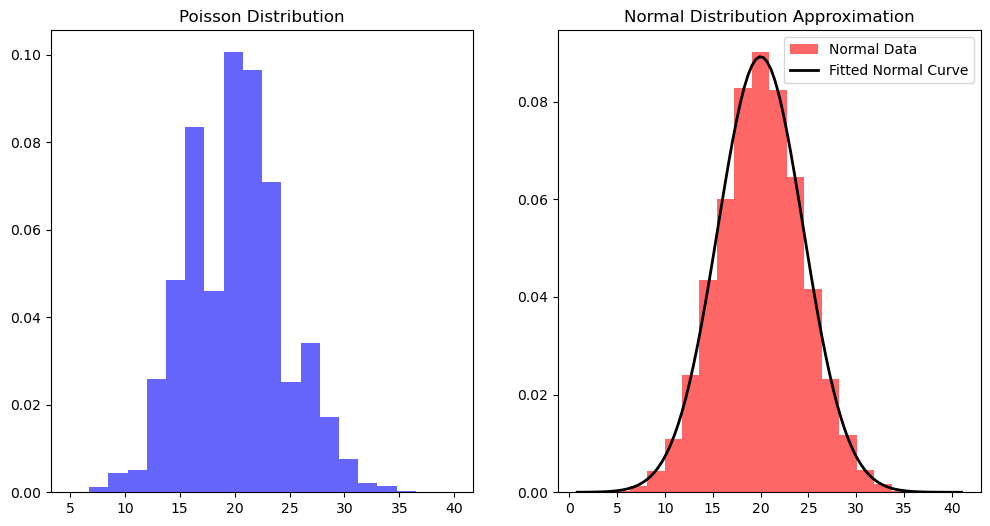

In [4]:
# Set random seeds for reproducibility
np.random.seed(11)

# Parameters for Poisson distribution
lambda_val = 20  # Average rate

# Generate Poisson data
poisson_data = np.random.poisson(lambda_val, 10000)

# Parameters for approximating Normal distribution
mu = lambda_val
sigma = np.sqrt(lambda_val)

# Generate Normal data for approximation
normal_data = np.random.normal(mu, sigma, 10000)

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot Poisson distribution
plt.subplot(1, 2, 1)
plt.title('Poisson Distribution')
plt.hist(poisson_data, bins=20, density=True, alpha=0.6, color='b', label='Poisson Data')

# Plot Normal distribution
plt.subplot(1, 2, 2)
plt.title('Normal Distribution Approximation')
plt.hist(normal_data, bins=20, density=True, alpha=0.6, color='r', label='Normal Data')

# Adding fitted Normal curve to Poisson data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'k', linewidth=2, label='Fitted Normal Curve')

plt.legend()
plt.show()


## Compared with different $\lambda$

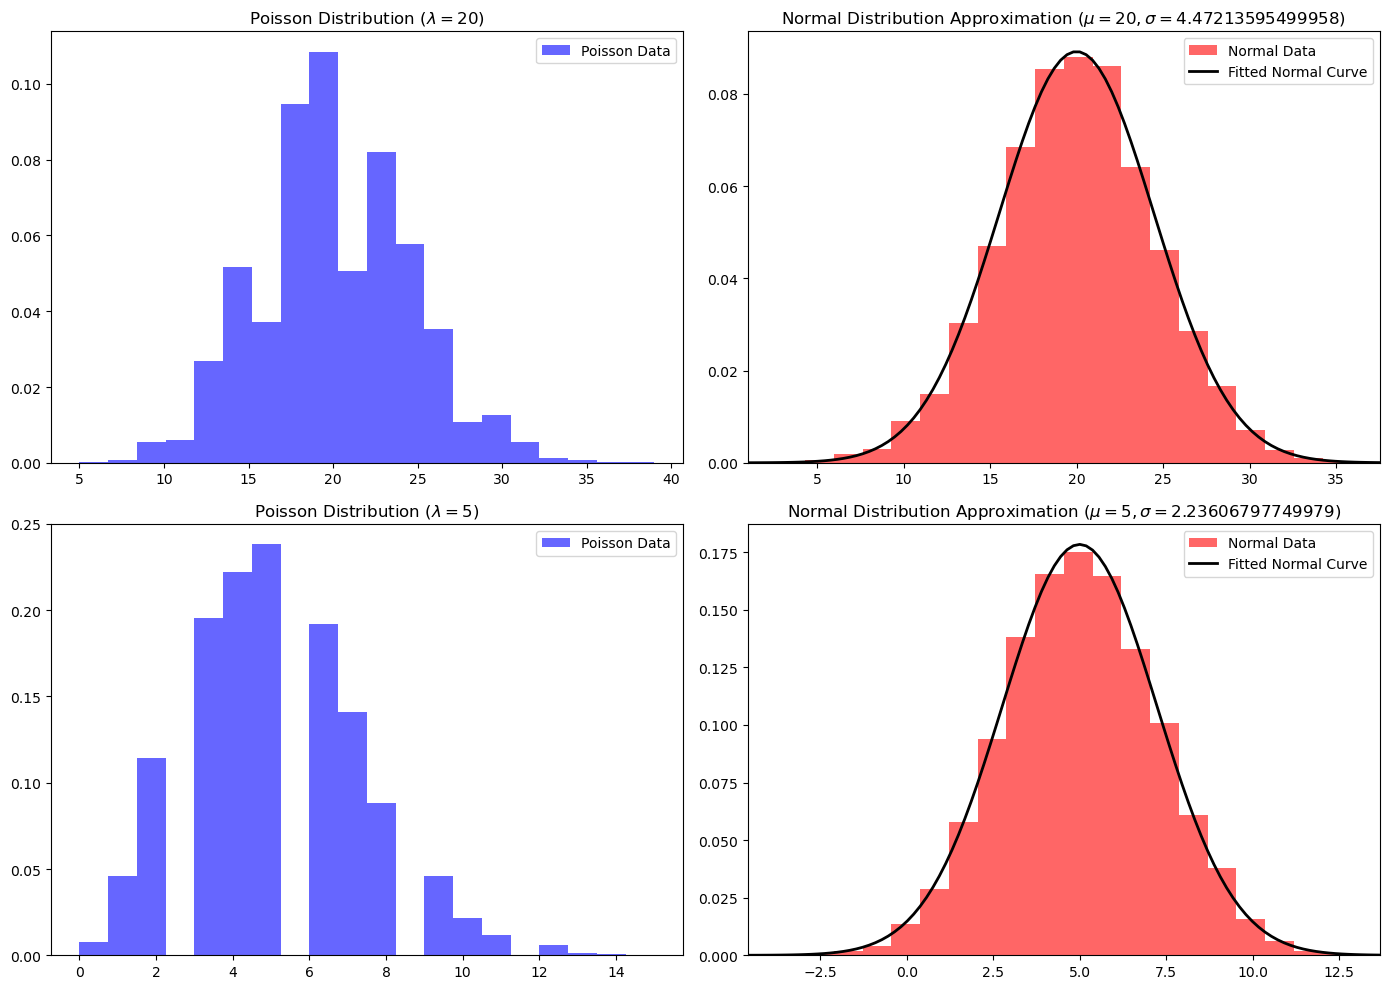

In [6]:
# Set random seeds for reproducibility
np.random.seed(1314)

# Generate subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop over different lambda values
for idx, lambda_val in enumerate([20, 5]):
    # Generate Poisson data
    poisson_data = np.random.poisson(lambda_val, 10000)
    
    # Parameters for approximating Normal distribution
    mu = lambda_val
    sigma = np.sqrt(lambda_val)
    
    # Generate Normal data for approximation
    normal_data = np.random.normal(mu, sigma, 10000)

    # Plot Poisson distribution
    axes[idx, 0].hist(poisson_data, bins=20, density=True, alpha=0.6, color='b', label='Poisson Data')
    axes[idx, 0].set_title(f'Poisson Distribution ($\\lambda={lambda_val}$)')
    axes[idx, 0].legend()

    # Plot Normal distribution
    axes[idx, 1].hist(normal_data, bins=20, density=True, alpha=0.6, color='r', label='Normal Data')

    # Adding fitted Normal curve to Poisson data
    xmin, xmax = axes[idx, 1].set_xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = stats.norm.pdf(x, mu, sigma)
    axes[idx, 1].plot(x, pdf, 'k', linewidth=2, label='Fitted Normal Curve')
    axes[idx, 1].set_title(f'Normal Distribution Approximation ($\\mu={mu}, \\sigma={sigma}$)')
    axes[idx, 1].legend()

plt.tight_layout()
plt.show()

# Close look on Log-normal Distribution

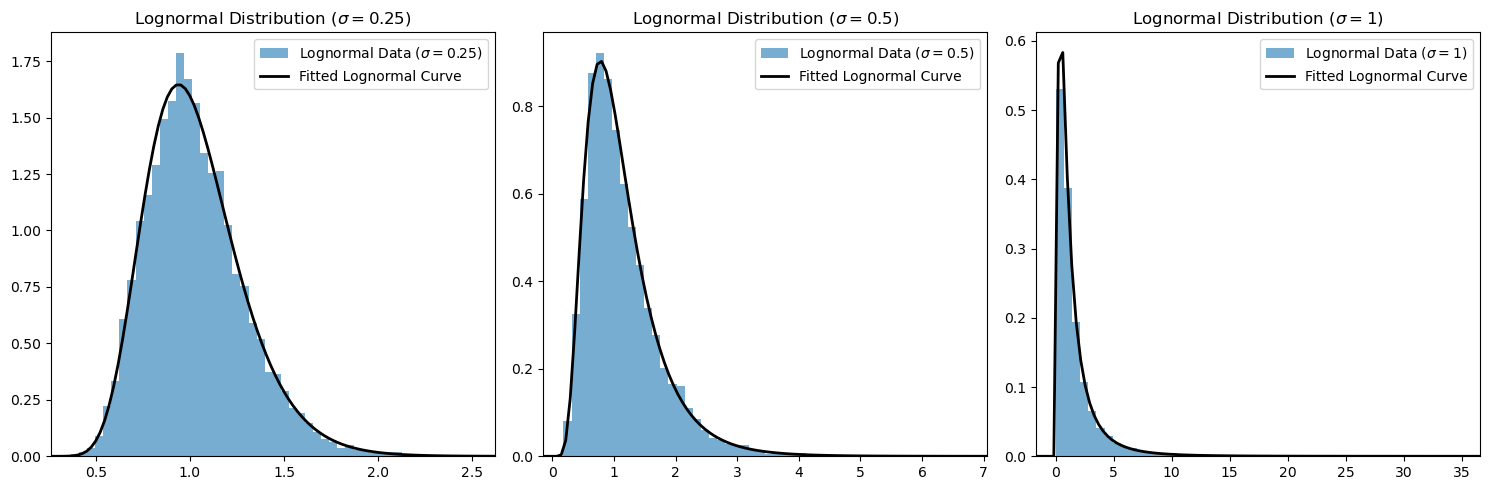

In [7]:
# Set random seed for reproducibility
np.random.seed(1314)

# Fixed mean for the distributions
mu = 0

# Different standard deviations to vary skewness
sigmas = [0.25, 0.5, 1]

# Generate subplots
fig, axes = plt.subplots(1, len(sigmas), figsize=(15, 5))

# Loop through each sigma value
for idx, sigma in enumerate(sigmas):
    # Generate Lognormal data
    lognormal_data = np.random.lognormal(mean=mu, sigma=sigma, size=10000)
    
    # Plot the distribution
    axes[idx].hist(lognormal_data, bins=50, density=True, alpha=0.6, label=f'Lognormal Data ($\\sigma={sigma}$)')
    
    # Add fitted Lognormal curve
    xmin, xmax = axes[idx].set_xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = stats.lognorm.pdf(x, sigma, scale=np.exp(mu))
    axes[idx].plot(x, pdf, 'k', linewidth=2, label='Fitted Lognormal Curve')
    
    axes[idx].set_title(f'Lognormal Distribution ($\\sigma={sigma}$)')
    axes[idx].legend()

plt.tight_layout()
plt.show()


## Log-normal in stock price modelling

In financial modelling and time series analysis, log returns are often preferred over simple returns for several reasons. These include mathematical simplicity when performing time aggregation, better statistical properties, and greater ease of use in stochastic calculus, among others.

Firstly, let's generate some simulated stock prices that follow a geometric Brownian motion, often used for modelling stock prices.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Simulate stock prices
T = 1000  # Number of days
mu = 0.001  # Expected return
sigma = 0.5  # Volatility
S0 = 100  # Initial stock price

# Generate random shocks
shocks = np.random.normal(0, sigma, T)

# Generate stock prices
prices = [S0]
for t in range(1, T):
    next_price = prices[-1] * np.exp((mu - 0.5 * sigma**2) + sigma * shocks[t])
    prices.append(next_price)

# Convert to a Pandas Series for convenience
prices = pd.Series(prices, name="Price")

# Calculate simple returns
simple_returns = prices.pct_change().dropna()

# Calculate log returns
log_returns = np.log(prices / prices.shift(1)).dropna()

Now, let's consider some of the advantages of using log returns:

1. Time Additivity

With log returns, it's straightforward to calculate the aggregated return over multiple time periods by simply summing the individual log returns.
$$
\ln(x_1/x_2) + \ln(x_3/x_2) = \ln(x_3/x_1)
$$

In [30]:
# Summing up log returns to get total return over time
total_log_return = log_returns.sum()

With simple returns, you would need to use a more complicated formula to aggregate returns over time.

2. Statistical Properties

Log returns are approximately normally distributed if the underlying price follows geometric Brownian motion, making them more amenable to statistical analysis.

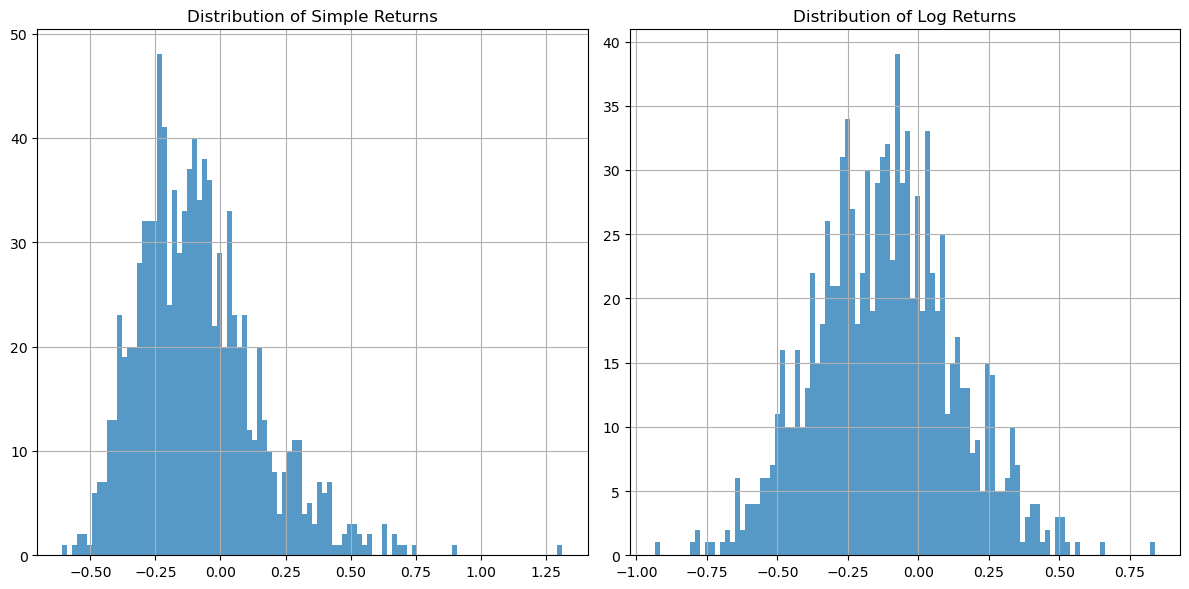

In [32]:
# Plotting the distribution of returns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of Simple Returns')
simple_returns.hist(bins=100, alpha=0.75)

plt.subplot(1, 2, 2)
plt.title('Distribution of Log Returns')
log_returns.hist(bins=100, alpha=0.75)

plt.tight_layout()
plt.show()

3. Easier for Mathematical Modelling

Log returns are often easier to work with in stochastic calculus and continuous-time models like the Black-Scholes equation.

This example demonstrates some advantages of log returns, including their more straightforward statistical and mathematical properties compared to simple returns.